In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
orders = pd.read_csv('/datasets/orders.csv')

In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')

## Часть 1. Приоритизация гипотез

In [5]:
hypo.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [6]:
for i in range(len(hypo)): 
    print(i, '-', hypo.iloc[i, 0])

0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1 - Запустить собственную службу доставки, что сократит срок доставки заказов
2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8 - Запустить акцию, дающую скидку на товар в день рождения


In [7]:
hypo['Ice'] = (hypo['Impact'] * hypo['Confidence'] / hypo['Efforts']).round(1)
hypo.sort_values(by='Ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


Согласно способу ICE, самая приоритетная гипотеза: "Запустить акцию, дающую скидку на товар в день рождения". У нее самый высокий показатель impact * confidence, а затраты (efforts) чуть ниже, чем у следующей гипотезы с большим потенциалом "Добавить два новых канала привлечения трафика..."

In [8]:
hypo['Rice'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence'] / hypo['Efforts']).round(1)
hypo.sort_values(by='Rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


Скорректировав расчет приоритизации добавлением охвата, мы видим, что гипотеза 8 (по индексу) заметно опустилась в рейтинге, так как эта акция охватывает небольшой сегмент пользователей, у которых в ближайшее время будет день рождения.

В тройке лидеров остались гипотезы 7 и 0. У гипотезы 7 прогнозируется очень широкий охват и большое влияние рассылок на пользователей, причем эксперты довольно уверены в своих выводах. У гипотезы 0 прогнозируется большое влияние на пользователей, хотя охват будет низким (отдельные каналы привлечения).

Наконец, в тройку лидеров попала гипотеза 2, которая, согласно прогнозам экспертов, охватит большое количество пользователей.

## Анализ А/В теста

In [9]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### 1. Кумулятивная выручка по группам

In [11]:
#заказы в группе А по дням
ordersA_daily = \
orders[orders['group'] == 'A'][['date','transactionId', 'visitorId', 'revenue']]\
.groupby('date', as_index=False).agg\
({'transactionId' : pd.Series.nunique, 'revenue':'sum'})
ordersA_daily.columns = ['date', 'orders_x_dateA', 'revenue_x_dateA']
ordersA_daily.head()

,date,orders_x_dateA,revenue_x_dateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [12]:
#кумулятивные заказы в группе А по дням
ordersA_cumulative = ordersA_daily.apply(
lambda x: ordersA_daily[ordersA_daily['date'] <= x['date']].agg(
    {'date' : 'max', 'orders_x_dateA' : 'sum', 'revenue_x_dateA' : 'sum'}), axis=1).sort_values(by='date')

In [13]:
#заказы в группе B по дням
ordersB_daily = \
orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg\
({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersB_daily.columns = ['date', 'orders_x_dateB', 'revenue_x_dateB']
ordersB_daily.head()

,date,orders_x_dateB,revenue_x_dateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [14]:
#куммулятивные заказы в группе B по дням
ordersB_cumulative = ordersB_daily.apply(
lambda x: ordersB_daily[ordersB_daily['date'] <= x['date']].agg(
{'date' : 'max', 'orders_x_dateB' : 'sum', 'revenue_x_dateB' : 'sum'}), axis=1).sort_values(by='date')

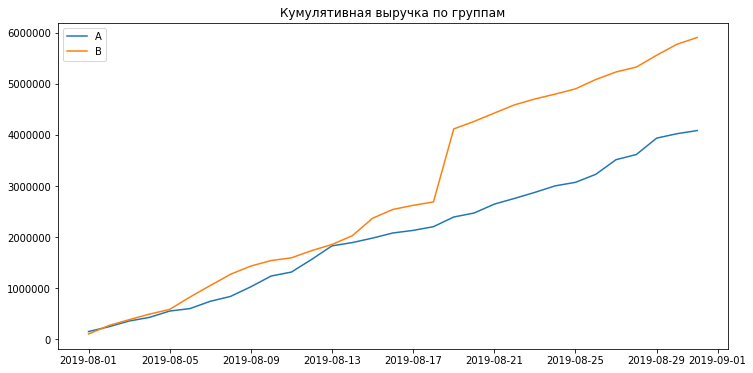

In [58]:
plt.figure(figsize=(12,6))
plt.plot(
    ordersA_cumulative['date'], ordersA_cumulative['revenue_x_dateA'], label='A')
plt.plot(
ordersB_cumulative['date'], ordersB_cumulative['revenue_x_dateB'], label = 'B')
plt.title('Кумулятивная выручка по группам')
plt.legend()

Судя по графику, кумулятивная выручка росла сначала одинаково в двух группах, затем в группе В она стала расти быстрее, пока 13.08 показатель группы А не приблизился к показателю группы В. Затем, видимо, в группе В был один большой заказ и далее выручка стала расти параллельно в двух группах.

### 2. Кумулятивный средний чек

In [16]:
ordersA_cumulative.head()

,date,orders_x_dateA,revenue_x_dateA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


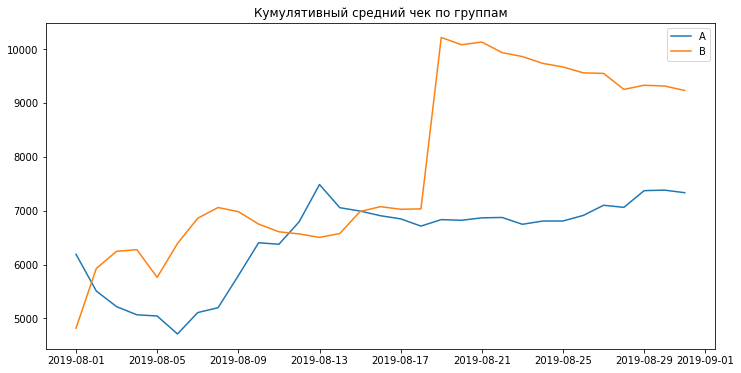

In [17]:
plt.figure(figsize=(12,6))
plt.plot(ordersA_cumulative['date'], ordersA_cumulative['revenue_x_dateA'] / ordersA_cumulative['orders_x_dateA'], label='A')
plt.plot(ordersB_cumulative['date'], ordersB_cumulative['revenue_x_dateB'] / ordersB_cumulative['orders_x_dateB'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.legend()

Здесь мы видим похожие линии на графике, только теперь лучше видно, что 13.08 в группе А была очень большая покупка, так что средний чек у этой группы даже выше, чем у группы В, тогда как по общей кумулятивной выручке группа В лидирует в этот день. 

Далее мы опять (как и на прошлом графике) видим резкий скачок среднего чека в группе В, обусловленный крупной покупкой. Но далее линии на этом графике перестают следовать линиям на предыдущем: мы видим, что средний чек в группе В постепенно снижается, в то время как в группе А продолжает немного расти. 

### 3. Относительное изменение кумулятивного среднего чека

In [18]:
merged_cumulative_orders = pd.merge(
    ordersA_cumulative, ordersB_cumulative, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_orders.columns = ['date', 'ordersA', 'revenueA', 'ordersB', 'revenueB']
merged_cumulative_orders.head()

,date,ordersA,revenueA,ordersB,revenueB
0,2019-08-01,24,148579,21,101217
1,2019-08-02,44,242401,45,266748
2,2019-08-03,68,354874,61,380996
3,2019-08-04,84,425699,78,489567
4,2019-08-05,109,549917,101,581995


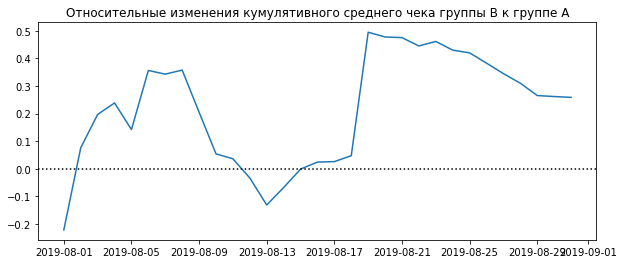

In [19]:
plt.figure(figsize=(10,4))
plt.plot(
    merged_cumulative_orders['date'], (
        merged_cumulative_orders['revenueB'] / merged_cumulative_orders['ordersB']) / (
    merged_cumulative_orders['revenueA'] / merged_cumulative_orders['ordersA']) - 1)
plt.title('Относительные изменения кумулятивного среднего чека группы В к группе А')
plt.axhline(y=0, color='black', linestyle=':')

Принимая во внимание и предыдущие графики, можно сказать, что в начале эксперимента лидировала группа А, затем средний чек группы В стал выше, изменения 13.08 связаны с единичной большой покупкой в группе А, а дальнейший резки отрыв группы В связан с выбросом (то есть тоже крупным заказом), который мы видели и на предыдущих графиках. Затем постепенно соотношение кумулятивных средних чеков по группам двигается в сторону 0, то есть кумулятивные средние чеки стремятся к равенству, но пока график не позволяет заключить, сравняются ли они.

### 4. Кумулятивная конверсия по группам

In [20]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [22]:
# Кумулятивные визиты в группе А
visitorsA_daily = \
visitors[visitors['group'] == 'A'][['date','visitors']]
visitorsA_cum = visitorsA_daily.apply(
    lambda x: visitorsA_daily[visitorsA_daily['date'] <= x['date']].agg(
        {'date' : 'max', 'visitors' : 'sum'}), axis = 1)
visitorsA_cum.columns = ['date', 'visitors']

In [23]:
# Кумулятивная конверсия в группе А
ordersA_cumulative = ordersA_cumulative.merge(visitorsA_cum, on='date')
ordersA_cumulative['conversion'] = (ordersA_cumulative['orders_x_dateA'] / ordersA_cumulative['visitors']).round(4)
ordersA_cumulative.head()

,date,orders_x_dateA,revenue_x_dateA,visitors,conversion
0,2019-08-01,24,148579,719,0.0334
1,2019-08-02,44,242401,1338,0.0329
2,2019-08-03,68,354874,1845,0.0369
3,2019-08-04,84,425699,2562,0.0328
4,2019-08-05,109,549917,3318,0.0329


In [24]:
# Куммулятивные визиты в группе B
visitorsB_daily = \
visitors[visitors['group'] == 'B'][['date','visitors']]
visitorsB_cum = visitorsB_daily.apply(
    lambda x: visitorsB_daily[visitorsB_daily['date'] <= x['date']].agg(
        {'date' : 'max', 'visitors' : 'sum'}), axis = 1)
visitorsB_cum.columns = ['date', 'visitors']

In [25]:
# Куммулятивная конверсия в группе B
ordersB_cumulative = ordersB_cumulative.merge(visitorsB_cum, on='date')
ordersB_cumulative['conversion'] = (ordersB_cumulative['orders_x_dateB'] / ordersB_cumulative['visitors']).round(4)
ordersB_cumulative.head()

,date,orders_x_dateB,revenue_x_dateB,visitors,conversion
0,2019-08-01,21,101217,713,0.0295
1,2019-08-02,45,266748,1294,0.0348
2,2019-08-03,61,380996,1803,0.0338
3,2019-08-04,78,489567,2573,0.0303
4,2019-08-05,101,581995,3280,0.0308


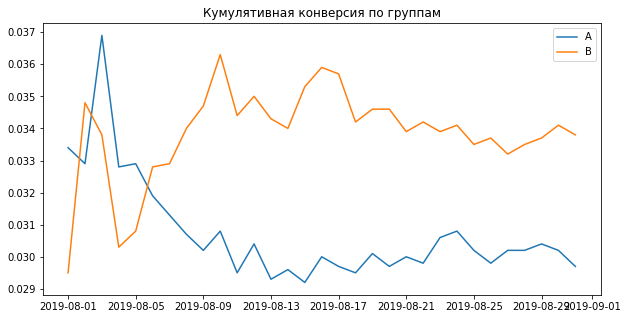

In [26]:
plt.figure(figsize=(10,5))
plt.plot(ordersA_cumulative['date'], ordersA_cumulative['conversion'], label='A')
plt.plot(ordersB_cumulative['date'], ordersB_cumulative['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.legend()

В первые дни эксперимента значения сильно колебались, затем конверсия группы В стала расти и превысила показательно конверсии группы А. В то же время наблюдается определенное сближение графиков конверсий групп А и В.

### 5. Относительные изменения кумулятивной конверсии группы В к группе А

In [27]:
merged_cumulative_conversion = pd.merge(
    ordersA_cumulative, ordersB_cumulative, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_conversion.head()

,date,orders_x_dateA,revenue_x_dateA,visitorsA,conversionA,orders_x_dateB,revenue_x_dateB,visitorsB,conversionB
0,2019-08-01,24,148579,719,0.0334,21,101217,713,0.0295
1,2019-08-02,44,242401,1338,0.0329,45,266748,1294,0.0348
2,2019-08-03,68,354874,1845,0.0369,61,380996,1803,0.0338
3,2019-08-04,84,425699,2562,0.0328,78,489567,2573,0.0303
4,2019-08-05,109,549917,3318,0.0329,101,581995,3280,0.0308


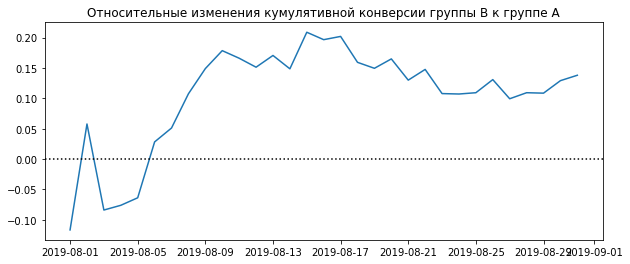

In [28]:
plt.figure(figsize=(10,4))
plt.plot(
    merged_cumulative_conversion['date'],
        merged_cumulative_conversion['conversionB'] / 
    merged_cumulative_conversion['conversionA'] - 1)
plt.title('Относительные изменения кумулятивной конверсии группы В к группе А')
plt.axhline(y=0, color='black', linestyle=':')

Как мы уже видели на предыдущем графике, в начале эксперимента лидировала группа А, и первые несколько дней видны сильные колебания отношения конверсий, затем  конверсия группы В стала расти лучше, чем в группе А, и была на протяжении трех недель не менее чем на 10% выше.

### 6. Точечный график количества заказов по пользователям

In [29]:
orders_x_user = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_x_user.columns = ['visitorId', 'n_orders']

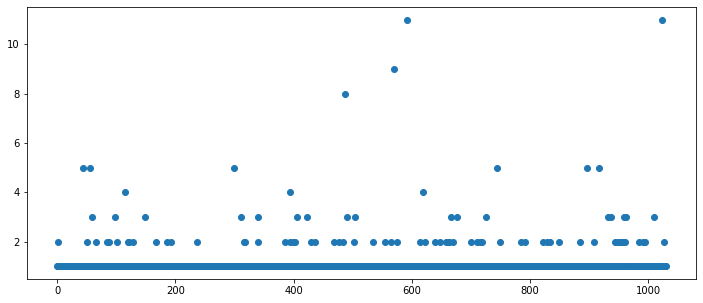

In [30]:
x_values = pd.Series(range(0, len(orders_x_user)))
plt.figure(figsize=(12,5))
plt.scatter(x_values, orders_x_user['n_orders'])

In [31]:
orders_x_user['n_orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: n_orders, dtype: float64

Есть пользователи, совершившие 8-11 заказов. В то же время подавляющее большинство пользователей сделали только один заказ, некоторые - 2, но бóльшее количество заказов на пользователя - достаточно редкое явление.

### 7. 95-й, 99-й перцентили количества заказов на пользователя

In [32]:
np.percentile(orders_x_user['n_orders'], [95, 99])

array([2., 4.])

Более двух заказов оформляли менее 5% пользователей, а более четырех заказов - менее 1%. Представляется обоснованным исключить из исследования пользователей, у которых было более двух заказов.

### 8. Точечный график стоимостей заказов

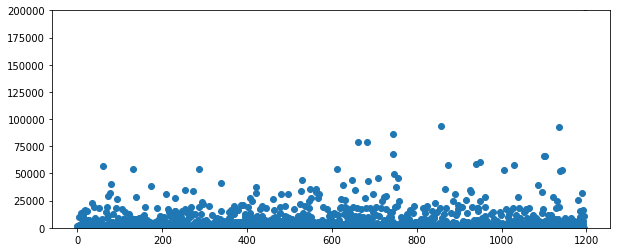

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,4))
plt.ylim(0, 200000)  #меняя масштаб графика мы можем посмотреть разброс стоимости более детально
plt.scatter(x_values, orders['revenue'])

plt.show()

Мы видим, что есть два заказа стоимостью более 200000, некоторое количество заказов стоимостью от 50 до 200 тысяч, а стоимость подавляющего большинства заказов составляет менее 25 тысяч.

### 9. 95-й и 99-й перцентили стоимости заказов

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Стоимость 5% заказов превышает 28 тысяч, и только 1% заказов превысил сумму в 58 тысяч. Представляется обоснованным исключить из анализа заказы стоимостью более 28 тысяч.

### 10. Статистическая значимость различий в конверсии между группами по "сырым" данным

In [35]:
#количество заказов на пользователя в группе А
orders_x_userA = orders[orders['group'] == 'A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_x_userA.columns = ('visitorId', 'n_orders')

In [36]:
#выборка с 0 для пользователей, у которых отсутствуют заказы в группе А
sampleA = pd.concat(
    [orders_x_userA['n_orders'], pd.Series(
        0, index=np.arange(visitorsA_daily['visitors'].sum() - len(orders_x_userA['n_orders'])), name='orders')], axis=0)

In [37]:
#количество заказов на пользователя в группе В
orders_x_userB = orders[orders['group'] == 'B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_x_userB.columns = ('visitorId', 'n_orders')

In [38]:
#выборка с 0 для пользователей, у которых отсутствуют заказы в группе В
sampleB = pd.concat(
    [orders_x_userB['n_orders'], pd.Series(
        0, index=np.arange(visitorsB_daily['visitors'].sum() - len(orders_x_userB['n_orders'])), name='orders')], axis=0)

In [59]:
#на всякий случай проверим распределение выборок на нормальность
print((stats.shapiro(sampleA)[1]), (stats.shapiro(sampleB)[1]))

0.0 0.0


In [40]:
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p_value: ', '{0:.3f}'.format(p_value))
if p_value >= 0.05:
    print('Между "неочищенными" выборками А и В нет статистических различий по конверсии')
else: print('Между "неочищенными" выборками А и В есть статистические различия по конверсии')

p_value:  0.008
Между "неочищенными" выборками А и В есть статистические различия по конверсии


In [41]:
print('Относительные различия в конверсии по группам: ', round((sampleB.mean() / sampleA.mean() - 1), 3))

Относительные различия в конверсии по группам:  0.138


Средняя конверсия в группе В выше почти на 14%, и это различие статистически значимо при уровне значимости 5%.

### 11. Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным

In [42]:
print((stats.shapiro(orders[orders['group'] == 'A']['revenue'])[1]), (stats.shapiro(orders[orders['group'] == 'B']['revenue'])[1]))

1.739703399801917e-34 0.0


In [43]:
p_value_revenue = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
print('p_value: ', '{:.3f}'.format(p_value_revenue))

p_value:  0.365


In [44]:
if p_value_revenue >= 0.05:
    print('Между "неочищенными" выборками А и В нет статистических различий по среднему чеку.')
else: print('Между "неочищенными" выборками А и В есть статистические различия по среднему чеку.')

Между "неочищенными" выборками А и В нет статистических различий по среднему чеку.


In [45]:
print('Относительные различия в среднем чеке по группам: ', round(

    (orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1), 3))

Относительные различия в среднем чеке по группам:  0.259


Средний чек в группе A ниже, чем в группе B на 26%, но эти различия не являются статистически значимыми. Такую большую разницу, 26%, наверняка внес единичный экстремальный заказ.

### 12. Статистическая значимость различий в конверсии между группами по "очищенным" данным

In [46]:
# # Уберем из данных пользователей, совершивших более двух заказазов, 
# а также тех, чья сумма заказа была более 28000

users_extreme_qty = pd.concat([
    orders_x_userA[orders_x_userA['n_orders'] > 2]['visitorId'],\
    orders_x_userB[orders_x_userB['n_orders'] > 2]['visitorId']], axis=0)
users_extreme_revenue = orders[orders['revenue'] > 28000]['visitorId']

extreme_users = pd.concat([users_extreme_qty, users_extreme_revenue], axis=0).drop_duplicates().sort_values()
print('Удалим из анализа', len(extreme_users.index), 'пользователей')

Удалим из анализа 74 пользователей


In [47]:
sampleA_filtered = pd.concat(
[orders_x_userA[np.logical_not(orders_x_userA['visitorId'].isin(
extreme_users))]['n_orders'], pd.Series(0, index=np.arange(visitorsA_daily['visitors'].sum(
) - len(orders_x_userA['n_orders'])), name='orders')], axis=0)

In [48]:
sampleB_filtered = pd.concat(
[orders_x_userB[np.logical_not(orders_x_userB['visitorId'].isin(
extreme_users))]['n_orders'], pd.Series(0, index=np.arange(visitorsB_daily['visitors'].sum(
) - len(orders_x_userB['n_orders'])), name='orders')], axis=0)

In [49]:
print((stats.shapiro(sampleA_filtered)[1]), (stats.shapiro(sampleB_filtered)[1]))

0.0 0.0


In [50]:
p_value = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]
print('p_value: ', '{0:.3f}'.format(p_value))
if p_value >= 0.05:
    print('Между "очищенными" выборками А и В нет статистических различий по конверсии.')
else: print('Между "очищенными" выборками А и В есть статистические различия по конверсии.')

p_value:  0.007
Между "очищенными" выборками А и В есть статистические различия по конверсии.


In [51]:
print('Относительные различия в конверсии по группам: ', round((sampleB_filtered.mean() / sampleA_filtered.mean() - 1), 3))

Относительные различия в конверсии по группам:  0.173


Даже удалив из анализа выбросы, мы видим, что конверсия в двух группах различичается, и в группе В она выше на 17%.

### 13. Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным

In [52]:
ordersA_filtered = orders[np.logical_and(
orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(extreme_users)))]['revenue']

In [53]:
ordersB_filtered = orders[np.logical_and(
orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(extreme_users)))]['revenue']

In [54]:
print(stats.shapiro(ordersA_filtered)[1], stats.shapiro(ordersB_filtered)[1])

3.3050564163703224e-24 1.4698235112376731e-27


In [55]:
p_value_filtered_revenue = stats.mannwhitneyu(ordersA_filtered, ordersB_filtered)[1]
print('p_value: ', '{:.3f}'.format(p_value_filtered_revenue))

p_value:  0.369


In [56]:
if p_value_filtered_revenue >= 0.05:
    print('Между "очищенными" выборками А и В нет статистических различий по среднему чеку.')
else: print('Между "очищенными" выборками А и В есть статистические различия по среднему чеку.')

Между "очищенными" выборками А и В нет статистических различий по среднему чеку.


In [57]:
print('Относительные различия в среднем чеке по группам: ', round(

    ordersB_filtered.mean() / ordersA_filtered.mean() - 1, 3))

Относительные различия в среднем чеке по группам:  -0.02


После обработки выбросов различия между средними чеками в группах А и В так и остались статистически не значимыми, а средний чек практически не отличается, потому что мы избавились от выбросов, которые сильно влияли на всю картину.

## Заключение

- Эксперимент проводился в течение месяца. 
- Даже не принимая во внимания выбросы по заказам, повлиявшим на средний чек, отношение среднего чека в группе В к среднему чеку в группе А не стабилизировалось и, возможно, еще будет падать. То есть нам вряд ли стоит ждать улучшения среднего чека в группе В.
- Конверсии в группах различны, отношение конверсии в группе В к конверсии в группе А тоже, всей видимости, не стабилизировалось, тем не менее мы наблюдаем превышение конверсии в группе В к группе А практически с первых дней эксперимента.

Таким образом, представляется обоснованным остановить эксперимент и зафиксировать победу группы В.
Следует отметить, что мы не знаем, какая гипотеза тестировалась, и только можем отметить, что она была эффективной для повышения конверсии, но не для повышения среднего чека.